In [1]:
import matplotlib.pyplot as plt

In [19]:
population_size = 5
no_of_generations = 5
no_of_items = 5
max_weight = 11
wt = [1,2,5,6,7]
pt = [1,6,18,22,28]
population = []
sum_points_generation = []

In [20]:
def valid_pop(chrom):
    x = 0
    for i in range(0,no_of_items):
        if chrom[i] is "1":
            x += wt[i]
            
    #print("weight" , x)
    if x <= max_weight:
        return 1
    else :
        return 0

In [21]:
#valid_pop("111")

In [22]:
import random
def rand_key(p): 
    key1 = "" 
    
    for i in range(p): 
        temp = str(random.randint(0, 1)) 
        key1 += temp           
    return(key1) 

In [23]:
i = 0
while i < population_size :
    #print("i :",i)
    str1 = rand_key(no_of_items)
    #print("str" ,str1)
    if (valid_pop(str1) == 1):
        population.append(str1)
        i = i+1
    #else:                              #(valid_pop(str1) == 0):
        #print("rejected")


In [24]:
#population


In [25]:
mutation_rate = 0.2
mutation = mutation_rate * no_of_generations

mutate_generation = []
for i in range(int(mutation)):
    gen_no = random.randint(1,no_of_generations)
    mutate_generation.append(gen_no)

#mutate_generation


In [26]:
import random

#wt = [10,20,30]
#pt = [60,100,120]

score = [0] * population_size
weight= [0] * population_size
#print("score",score)
#print("weight",weight)
print("weight:")
print(wt)
print("points")
print(pt)
print("Initial Population :")
print(population)
print("mutation generation")
print(mutate_generation)
print("--------------------------------------------")

def fitScore(chrom):
    x = 0
    y = 0
    for i in range(0,len(wt)):
        if chrom[i] is "1":
            x+= wt[i]
            y+= pt[i]
    return x, y


def evolve(c1,scr,p1,p2,t1,t2):
    print("parent 1: ",p1)
    print("parent 2: ",p2)
    print("parent 1 points: ",score[t1])
    print("parent 2 points: ",score[t2])
    flag = 0
    
    if score[t1] < scr:
        print(f'Child : {c1} with score : {scr} replaces Parent 1 :{p1} with score {score[t1]}')
        score[t1] = scr
        population[t1] = c1
        flag = 1
        
    if score[t2] < scr and flag == 0 :
        print(f'Child : {c1} with score : {scr} replaces Parent 2 :{p2} with score {score[t2]}')
        score[t2] = scr
        population[t2] = c1
        

i=1
while (i<= no_of_generations):
    points_sum = 0
    print("Generation#",i)
    # fitness score all
    for j in range(0,len(population)):
        weight[j],score[j] = fitScore(population[j])
        points_sum += weight[j]
        #print(population[j],weight[j],score[j])
        #print("score",score)
        #print("weight",weight)
    
    sum_points_generation.append(points_sum)
    
    
    # Selection
    t1 = random.randint(0,population_size-1) # these are candidates
    t2 = random.randint(0,population_size-1)
    ''''while(t1==t2):
        t1 = random.randint(1, 3)'''

    p1 =population[t1]
    p2= population[t2]
    print("Candidate parent-1 :",p1,score[t1])
    print("Candidate parent-2 :",p2,score[t2])
    
    #Crossover
    split_point = len(wt)//2
    #split_point =  random.randint(0,len(wt)-1)
    c1 = p1[0:split_point] + p2[split_point:]
    print("After Crossover:",c1)
    
    #Mutation
    if i in mutate_generation:
        child = [0] * no_of_items
        t3 = random.randint(0, no_of_items-1)
        for j in range(0,len(wt)):
            child[j] = c1[j]

        if child[t3] == '1':
            child[t3] = '0'
        else:
            child[t3] = '1'

        c1 = ''.join(child)
        print("After Mutation:", c1)
        
    #Validation
    child_weight, child_score = fitScore(c1)
    print('child-weight',child_weight)
    print('child-point',child_score)
        
    if child_weight <= max_weight:
        evolve(c1,child_score,p1,p2,t1,t2)
    
    if child_weight > max_weight:
        print("Maximum weight exceeded!!")

    print("Child",c1,"Weight",child_weight,"Point",child_score)
    #print("Parents:")
    #print(population)
    print("maximum points",max(score))
    index = score.index(max(score))
    print("best solution",population[index])
    print("Points Sum",points_sum)
    i+=1
    print("-------------------------------------------------------------")

weight:
[1, 2, 5, 6, 7]
points
[1, 6, 18, 22, 28]
Initial Population :
['11000', '01001', '00110', '10100', '00000']
mutation generation
[4]
--------------------------------------------
Generation# 1
Candidate parent-1 : 00000 0
Candidate parent-2 : 10100 19
After Crossover: 00100
child-weight 5
child-point 18
parent 1:  00000
parent 2:  10100
parent 1 points:  0
parent 2 points:  19
Child : 00100 with score : 18 replaces Parent 1 :00000 with score 0
Child 00100 Weight 5 Point 18
maximum points 40
best solution 00110
Points Sum 29
-------------------------------------------------------------
Generation# 2
Candidate parent-1 : 11000 7
Candidate parent-2 : 00100 18
After Crossover: 11100
child-weight 8
child-point 25
parent 1:  11000
parent 2:  00100
parent 1 points:  7
parent 2 points:  18
Child : 11100 with score : 25 replaces Parent 1 :11000 with score 7
Child 11100 Weight 8 Point 25
maximum points 40
best solution 00110
Points Sum 34
--------------------------------------------------

Text(0, 0.5, 'generation score')

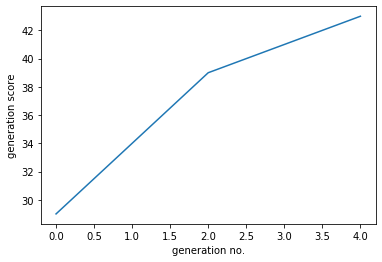

In [27]:
#sum_points_generation
plt.plot(sum_points_generation)
plt.xlabel("generation no.")
plt.ylabel("generation score")

In [146]:
#random.randint(0,2)